# Python summary

In this book, at several instances we use Python to collect, process, analyze and visualize data. We also use Python for some simulations. As not all are familiar with Python programming language, here are some basics.

## Libraries
We use some libraries with inbuilt functions which makes our script easier to code as well as more readable. Most often we use
* **numpy** for various scientific calculations
* **matplotlib** for plotting our data
* **scipy** for least square regression

## Save and process data
We can 'store' data in an array. Each of the values in that array can be processed, plotted, printed and so on. In the example below we have an array named $a$. Some values are stored. We print these values, change one of them and print again the values (you can run the code cell by clicking on the {fa}`rocket` at the top right cornet and click on live code).

In [4]:
import numpy as np
a = np.array([0.0, 1.0, 1.2, 0.8, 0.5]) #making an array with some values.
print(a)                                #printing the values.
a[1] = 2.0                              #changing the value of the second element.
print(a)                                #printing the values.

[0.  1.  1.2 0.8 0.5]
[0.  2.  1.2 0.8 0.5]


As shown above, to print values, we use the `print` command. 

With an array filled with data, we can do some statistic calculations:

In [7]:
a_mean = np.mean(a)                          #Calculating the mean value of  a
a_std = np.std(a,ddof=1)                     #Calculating the standard deviation of a 
a_unc = np.std(a,ddof=1)/np.sqrt(len(a))     #Calculating the standard error of a

print("Mean value of a is: ",a_mean)         #printing the mean value of a
print("Standard deviation of a is: ",a_std)  #printing the standard deviation of a
print("Standard error of a is: ",a_unc)      #printing the standard error of a

#more neatly:
print("Standard error of a is: ", round(a_unc,1))      #printing the standard error of a

Mean value of a is:  0.9
Standard deviation of a is:  0.754983443527075
Standard error of a is:  0.33763886032268264
Standard error of a is:  0.3


## Functions
You often use a piece of code several times. Sometimes with different values. If that happens, it is useful to write a function yourself. You must define a **function** and it is given a specific name. After the function name you specify the input variables. The variables inside the function are only temporarily stored inside the function temp_var and therefore cannot be used outside the function. This is called a local variable.


In [ ]:
def sum_function(i1, i2): #this sum_function requires two input variables
    temp_var = i1 + i2    #these input variables are added together and stored in a temporary variable
    return  temp_var      #that stored value is returned.

x = sum_function(3, 5) 

print(x) # Dit print 8


Now try it yourselves using a product function...

In [ ]:
def prod_function(i1, i2): #this prod_function requires two input variables


## Plotting

Often we want a visual representation of our data. In Python we can easily plot our data using the library matplotlib. This library support various plots, where we will show a few below. However, many more examples can be found <a href="https://matplotlib.org/stable/tutorials/introductory/pyplot.html" target="_blank">here</a>

### Histogram

A histogram shows how often a value or a certain range occurs in a data set.

In [ ]:
import matplotlib.pyplot as plt #Importing the matplotlib library

# Making a data set with a normal distribution
data = np.random.normal(0,5,1000)
plt.figure(num='histfig')   # Create a new figure

plt.hist(data,bins='auto',density=1, label='Occurence') # Plot the data

plt.xlabel('Values')        #Label for the x-as
plt.ylabel('Probability')   #Label for the y-as
plt.legend()                #Including a legend
plt.show()                  #Show the plot


### Scatterplot

Measurements in a dataset can be displayed in a scatter plot. Only the points are plotted (black in color here `k.`) and no line is drawn between the points. Below is an example of how a scatter plot can be made. 


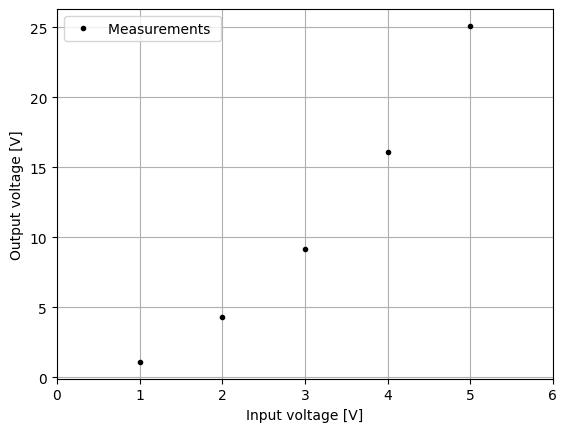

In [10]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [1.1, 4.3, 9.2, 16.1, 25.1]

plt.figure(num='figscatterplot')

plt.plot(x,y,'k.', label='Measurements ')

#enhancing the visuals
plt.xlabel('Input voltage [V]')
plt.ylabel('Output voltage [V]')
plt.legend()
plt.grid()
plt.xlim(0,6)

plt.show()



## Curve fitting

To find the line of best fit, we can use `curve_fit` from the **scipy** library (it uses a least square regression). This function requires three inputvalues: The function it should fit to, the $x$-values and the $y$-values The $x$ and $y$ values are arrays with your measurements.

The `curve_fit` returns two variables, the values and covariance. The variable values_funcfit is an array with the optimal values ​​of the parameters for the fitted function.

covariance is a 2d array containing the covariance of the fitted parameters. The values ​​on the diagonal indicate the variation of the fitted parameters. The standard error of the function with fitted parameters can be calculated as follows: `np.sqrt(np.diag(covariance))`. (Note! This is only a crash course Python. More information on data-analysis, measurement uncertainties and Python can be easily found on the web).

In [20]:
from scipy.optimize import curve_fit

def fit_function(x,a,b):
        return x**a+b

values, covariance = curve_fit(fit_function, x, y)


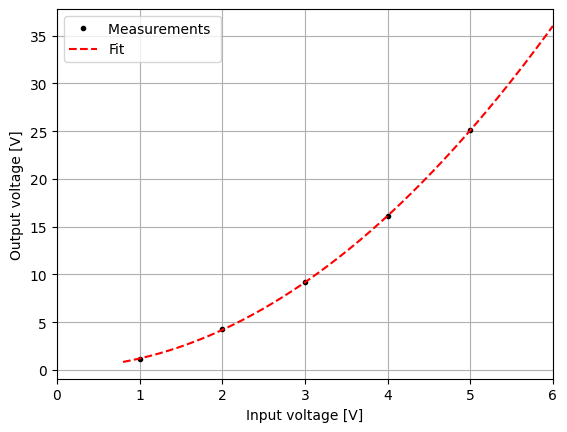

a =  1.9972753048059952
b =  0.20083196709451012


In [22]:
x_test = np.linspace(0.8*min(x),1.2*max(x),1000) #creating a test array for the x-values
y_fit = fit_function(x_test,values[0],values[1]) #calculating the y-values for the test array

plt.figure(num='figscatterplot')

plt.plot(x,y,'k.', label='Measurements ')
plt.plot(x_test,y_fit,'r--', label='Fit')

#enhancing the visuals
plt.xlabel('Input voltage [V]')
plt.ylabel('Output voltage [V]')
plt.legend()
plt.grid()
plt.xlim(0,6)

plt.show()

print("a = ",values[0])
print("b = ",values[1])